In [1]:
import json
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import polynomial

import time
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
import similaritymeasures

In [2]:
with open('../data/pop_track_id_features_and_analysis.json') as f:
    features_and_analysis = json.load(f)

In [3]:
song_ids = features_and_analysis.keys()

In [4]:
song_ids_list = list(song_ids)

In [5]:
# Features, type is list
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][0][0])

{'danceability': 0.443, 'energy': 0.558, 'key': 0, 'loudness': -5.436, 'mode': 1, 'speechiness': 0.0624, 'acousticness': 0.441, 'instrumentalness': 0, 'liveness': 0.163, 'valence': 0.248, 'tempo': 116.838, 'type': 'audio_features', 'id': '15O20RQyWJgKrkHID9ynT9', 'uri': 'spotify:track:15O20RQyWJgKrkHID9ynT9', 'track_href': 'https://api.spotify.com/v1/tracks/15O20RQyWJgKrkHID9ynT9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/15O20RQyWJgKrkHID9ynT9', 'duration_ms': 233337, 'time_signature': 4}


In [29]:
# Analysis, type is dictionary
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1].keys())
print("TRACK")
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1]['track'])

print("\n\nSECTIONS")
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1]['sections'])


dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])
TRACK
{'num_samples': 5145082, 'duration': 233.33705, 'sample_md5': '', 'offset_seconds': 0, 'window_seconds': 0, 'analysis_sample_rate': 22050, 'analysis_channels': 1, 'end_of_fade_in': 0.0, 'start_of_fade_out': 230.29551, 'loudness': -5.436, 'tempo': 116.838, 'tempo_confidence': 0.048, 'time_signature': 4, 'time_signature_confidence': 0.989, 'key': 0, 'key_confidence': 0.581, 'mode': 1, 'mode_confidence': 0.588, 'code_version': 3.15, 'echoprint_version': 4.12, 'synch_version': 1.0, 'rhythm_version': 1.0}


SECTIONS
[{'start': 0.0, 'duration': 7.55561, 'confidence': 1.0, 'loudness': -18.004, 'tempo': 113.228, 'tempo_confidence': 0.219, 'key': 0, 'key_confidence': 0.0, 'mode': 1, 'mode_confidence': 0.0, 'time_signature': 4, 'time_signature_confidence': 0.7}, {'start': 7.55561, 'duration': 32.87778, 'confidence': 1.0, 'loudness': -9.152, 'tempo': 114.553, 'tempo_confidence': 0.291, 'key': 0, 'key_confidence'

In [7]:
def compare_bars_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_bars = features_and_analysis[song_id_1][1]['bars']
    song_2_bars = features_and_analysis[song_id_2][1]['bars']
    
    num_bars_1 = len(song_1_bars)
    num_bars_2 = len(song_2_bars)
    
    durations_bars_1 = [bar['duration'] for bar in song_1_bars]
    durations_bars_2 = [bar['duration'] for bar in song_2_bars]
    
    print("number of bars in song 1: ", num_bars_1)
    print("number of bars in song 2: ", num_bars_2)
    
    print("Average duration of bars in song 1: ", sum(durations_bars_1) / len(durations_bars_1))
    print("Average duration of bars in song 2: ", sum(durations_bars_2) / len(durations_bars_2))


In [8]:
compare_bars_of_two_songs(song_ids_list[0],song_ids_list[1], features_and_analysis)

number of bars in song 1:  114
number of bars in song 2:  95
Average duration of bars in song 1:  2.016471140350877
Average duration of bars in song 2:  2.411837052631579


In [9]:
def compare_loudness_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    song_2_sections = features_and_analysis[song_id_2][1]['sections']
    start_duration_loudness_1 = [(section['start'], section['duration'], section['loudness']) for section in song_1_sections]
    start_duration_loudness_2 = [(section['start'], section['duration'], section['loudness']) for section in song_2_sections]

    x_1 = [start for (start,_,_) in start_duration_loudness_1] 
    x_1 = [max(x_1) - start for start in x_1]
    y_1 = [-1 * loudness for (_,_,loudness) in start_duration_loudness_1]
    
    x_2 = [start for (start,_,_) in start_duration_loudness_2] 
    x_2 = [max(x_2) - start for start in x_2]
    y_2 = [-1 * loudness for (_,_,loudness) in start_duration_loudness_2]
   
    sns.lineplot(x_1,y_1, label="song_1")
    sns.lineplot(x_2,y_2, label="song_2")
    plt.xlabel("Time in seconds")
    plt.ylabel("Loudness")
    plt.show()
    

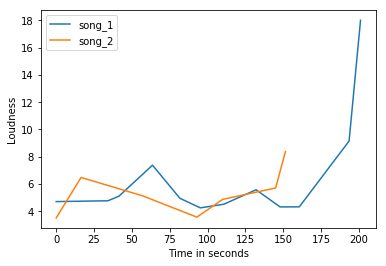

In [10]:
compare_loudness_of_two_songs(song_ids_list[0], song_ids_list[10], features_and_analysis)

In [11]:
def compare_tempo_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    song_2_sections = features_and_analysis[song_id_2][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]
    start_duration_tempo_2 = [(section['start'], section['duration'], section['tempo']) for section in song_2_sections]

    x_1 = [start for (start,_,_) in start_duration_tempo_1] 
    x_1 = [max(x_1) - start for start in x_1]
    y_1 = [tempo for (_,_,tempo) in start_duration_tempo_1]
    
    x_2 = [start for (start,_,_) in start_duration_tempo_2] 
    x_2 = [max(x_2) - start for start in x_2]
    y_2 = [tempo for (_,_,tempo) in start_duration_tempo_2]
   
    sns.lineplot(x_1,y_1, label="song_1")
    sns.lineplot(x_2,y_2, label="song_2")
    plt.xlabel("Time in seconds")
    plt.ylabel("tempo")
    plt.show()
    

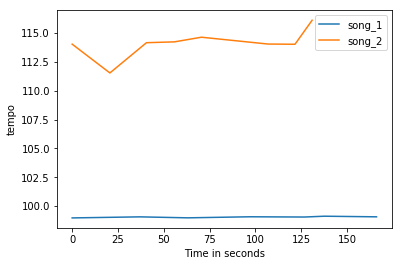

In [23]:
compare_tempo_of_two_songs(song_ids_list[100], song_ids_list[105], features_and_analysis)

In [24]:
def get_curve_for_tempo(song_id_1, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]

    x = [start for (start,_,_) in start_duration_tempo_1] 
    y = [tempo for (_,_,tempo) in start_duration_tempo_1]
#     print(len(x))
    
#     z = np.polyfit(x, y, 9)
#     f = np.poly1d(z)  
#     x_new = np.linspace(x[0], x[-1], 100)
#     y_new = f(x_new)

#     plt.plot(x_new, y_new, 'o')
#     plt.xlim([x[0]-10, x[-1] + 10 ])
    spl = InterpolatedUnivariateSpline(x, y)
    xs = np.linspace(x[0], x[-1], 1000)
    spl.set_smoothing_factor(0.02)
    plt.plot(xs, spl(xs), 'g', lw=3)
    print(spl.integral(0, 50))
    
    sns.lineplot(x,y, label="song_1")
    plt.xlabel("Time in seconds")
    plt.ylabel("tempo")
    plt.show()
    

7804.873101258625


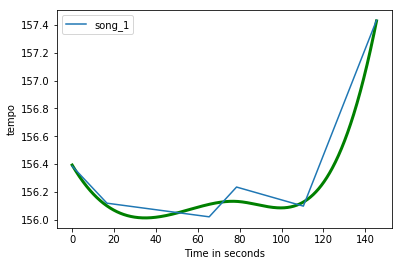

In [25]:
get_curve_for_tempo(song_ids_list[2], features_and_analysis)

17.81470247419197


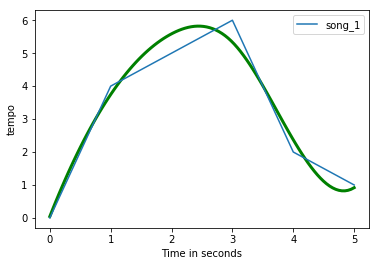

In [26]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 4, 5, 6, 2, 1]
spl = InterpolatedUnivariateSpline(x, y)
xs = np.linspace(x[0], x[-1], 100)
spl.set_smoothing_factor(1)
plt.plot(xs, spl(xs), 'g', lw=3)
print(spl.integral(x[0], x[-1]))

sns.lineplot(x,y, label="song_1")
plt.xlabel("Time in seconds")
plt.ylabel("tempo")
plt.show()

In [27]:
def find_most_similar_tempo_song(song_id_1, features_and_analysis):
    print(len(song_ids_list))
    start_time = time.time()
    most_similar = None
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]
    x_1 = [start for (start,_,_) in start_duration_tempo_1] 
    y_1 = [tempo for (_,_,tempo) in start_duration_tempo_1]
    x_1 = np.interp(x_1, (np.min(x_1), np.max(x_1)), (0, 100))
    
    xs = np.linspace(x_1[0], x_1[-1], 30)
    spl_1 = InterpolatedUnivariateSpline(x_1, y_1)
    spl_1.set_smoothing_factor(0.1)
    spl_y_1 = spl_1(xs)
    
    curve_1_data = np.zeros((30, 2))
    curve_1_data[:, 0] = xs
    curve_1_data[:, 1] = spl_y_1
    
    

    similarities = []
    start_time = time.time()
    for song_id_2 in song_ids_list:
        song_2_sections = features_and_analysis[song_id_2][1]['sections']
        start_duration_tempo_2 = [(section['start'], section['duration'], section['tempo']) for section in song_2_sections]
        x_2 = [start for (start,_,_) in start_duration_tempo_2] 
        y_2 = [tempo for (_,_,tempo) in start_duration_tempo_2]
        x_2 = np.interp(x_2, (np.min(x_2), np.max(x_2)), (0, 100))
        try:
            spl_2 = InterpolatedUnivariateSpline(x_2, y_2)
            spl_2.set_smoothing_factor(0.1)



            spl_y_2 = spl_2(xs)
            curve_2_data = np.zeros((30, 2))
            curve_2_data[:, 0] = xs
            curve_2_data[:, 1] = spl_y_2


            distance_frechet = similaritymeasures.frechet_dist(curve_1_data, curve_2_data)
            similarities.append((song_id_2, distance_frechet))
        except Exception as e:
            print("unable to process song: ", song_id_2)

    time_elapsed = time.time() - start_time
    print("Distance dtw--- %s seconds ---" % (time_elapsed))
    print(len(similarities))
    print(time_elapsed/len(similarities))
    
    similarities = sorted(similarities, key=lambda tup: tup[1], reverse = False)
    print(similarities[0:10])
    
    
#     start_time = time.time()
#     distance_pcm = similaritymeasures.pcm(curve_1_data, curve_2_data)
#     print("Distance PCM --- %s seconds ---" % (time.time() - start_time))
#     print(distance_pcm)
#     print("\n")
    
#     start_time = time.time()
#     distance_area_between_two_curves = similaritymeasures.area_between_two_curves(curve_1_data, curve_2_data)
#     print("Distance Area --- %s seconds ---" % (time.time() - start_time))
#     print(distance_area_between_two_curves)
#     print("\n")
    
#     start_time = time.time()
#     distance_curve_length_measure = similaritymeasures.curve_length_measure(curve_1_data, curve_2_data)
#     print("Distance curve length --- %s seconds ---" % (time.time() - start_time))
#     print(distance_curve_length_measure)
#     print("\n")
    
#     start_time = time.time()
#     distance_dtw, _ = similaritymeasures.dtw(curve_1_data, curve_2_data)
#     print("Distance DTW--- %s seconds ---" % (time.time() - start_time))
#     print(distance_dtw)
    
    
#     plt.plot(xs, spl_1(xs), 'g', lw=3)
#     plt.plot(xs, spl_2(xs), 'y', lw=3)
#     sns.lineplot(x_1,y_1, label="song_1")
#     sns.lineplot(x_2,y_2, label="song_2")
#     plt.xlabel("Time in seconds")
#     plt.ylabel("tempo")
#     plt.show()

In [312]:
find_most_similar_tempo_song(song_ids_list[173], features_and_analysis)

2556


/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program

unable to process song:  1est72o2prNA80flC5ncoN


/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program

unable to process song:  577YBGuskWkVDCxZrLRB4v
unable to process song:  5JW8njiQorZ7m2VHYddTt6


/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


unable to process song:  2sa35Fu5jG7UBb82NVZWMm


/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


unable to process song:  3PI9d61o3VO504SUAKw2cO


/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/jimmychen/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program

Distance dtw--- 30.119831085205078 seconds ---
2551
0.011807068241946326
[('2PwXOevGUSkU8qaYZjgLq2', 0.0), ('6rDN0EFbzYRsIyrhEP4iad', 1733366.1146002116), ('6DXoRCLBJexf9tkA0Dh7aT', 1734032.4492179852), ('24jvD83UgLmrdGjhWTFslY', 1735494.932584101), ('2meEiZKWkiN28gITzFwQo5', 1735604.1900877103), ('4Gx4trpKEbcJy6JarDuNvR', 1735713.4780355224), ('1tT55K6VEyO6XFDxK4lDQe', 1735772.6167388256), ('1mSlftOO1dlDRXAyOE0Sbd', 1735773.018360836), ('5uIYONgpUQ7t0v7D6CTMBt', 1735786.8114381796), ('1jZhF1p0fLaVZHAyfjkumE', 1735787.3147303401)]


In [320]:
def compare_song_tempos(song_id_1, song_id_2, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]
    x_1 = [start for (start,_,_) in start_duration_tempo_1] 
    y_1 = [tempo for (_,_,tempo) in start_duration_tempo_1]
    x_1 = np.interp(x_1, (np.min(x_1), np.max(x_1)), (0, 100))
    
    xs = np.linspace(x_1[0], x_1[-1],100)
    spl_1 = interpolate.interp1d(x_1, y_1)
    #spl_1.set_smoothing_factor(0.02)
    spl_y_1 = spl_1(xs)
    
    curve_1_data = np.zeros((100, 2))
    curve_1_data[:, 0] = xs
    curve_1_data[:, 1] = spl_y_1
    
    
    song_2_sections = features_and_analysis[song_id_2][1]['sections']
    start_duration_tempo_2 = [(section['start'], section['duration'], section['tempo']) for section in song_2_sections]
    x_2 = [start for (start,_,_) in start_duration_tempo_2] 
    y_2 = [tempo for (_,_,tempo) in start_duration_tempo_2]
    x_2 = np.interp(x_2, (np.min(x_2), np.max(x_2)), (0, 100))
    spl_2 = interpolate.interp1d(x_2, y_2)
    #spl_2.set_smoothing_factor(0.2)

    spl_y_2 = spl_2(xs)
    curve_2_data = np.zeros((100, 2))
    curve_2_data[:, 0] = xs
    curve_2_data[:, 1] = spl_y_2


    distance_frechet = similaritymeasures.frechet_dist(curve_1_data, curve_2_data)
    print(distance_frechet)

   
    
    
    plt.plot(xs, spl_1(xs), 'g', lw=3)
    plt.plot(xs, spl_2(xs), 'y', lw=3)
    #sns.lineplot(x_1,y_1, label="song_1")
    #sns.lineplot(x_2,y_2, label="song_2")
    plt.xlabel("Time in seconds")
    plt.ylabel("tempo")
    plt.show()

9.3329312511093


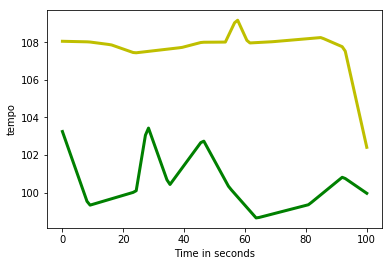

In [321]:
compare_song_tempos(song_ids_list[1], '2meEiZKWkiN28gITzFwQo5', features_and_analysis)

In [315]:
def find_most_similar_median_tempo_song(song_id_1, features_and_analysis):
    start_time = time.time()
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]
    y_1 = [tempo for (_,_,tempo) in start_duration_tempo_1]
    median_tempo_1 = np.median(y_1)
    
    

    similarities = []
    for song_id_2 in song_ids_list:
        song_2_sections = features_and_analysis[song_id_2][1]['sections']
        start_duration_tempo_2 = [(section['start'], section['duration'], section['tempo']) for section in song_2_sections]
        y_2 = [tempo for (_,_,tempo) in start_duration_tempo_2]
        median_tempo_2 = np.median(y_2)
        absolute_difference  = abs(median_tempo_1 - median_tempo_2)
        similarities.append((song_id_2, absolute_difference))
    time_elapsed = time.time() - start_time
    print("Distance median--- %s seconds ---" % (time_elapsed))
    print(len(similarities))
    print(time_elapsed/len(similarities))
    
    similarities = sorted(similarities, key=lambda tup: tup[1], reverse = False)
    print(similarities[0:10])
    

In [316]:
find_most_similar_median_tempo_song(song_ids_list[73], features_and_analysis)

Distance median--- 0.16177725791931152 seconds ---
2556
6.32931369011391e-05
[('2TmWgYDevPOukQGNJPeZrN', 0.0), ('0ikmhbH2wPx0iFayhraSWp', 0.14800000000002456), ('5p7ujcrUXASCNwRaWNHR1C', 0.16599999999999682), ('5WvAo7DNuPRmk4APhdPzi8', 0.19649999999998613), ('2tAXJtlhqsT7kJoH4yTGhx', 0.20599999999998886), ('5DuT7x2TtzMerIe94Ju5wI', 0.2115000000000009), ('2qXicQG06oT0ijKBznpgQv', 0.22999999999996135), ('6TCW0OXyzUHN5QCCIj7Hr8', 0.23400000000000887), ('6rJZ1otRMXH8UHzYBWCfv1', 0.23649999999997817), ('4247FwxHfmtIJgILhAKjaa', 0.2629999999999768)]
